In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 148MB/s]
100% 1.06G/1.06G [00:08<00:00, 139MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
# Load and preprocess data
train_ds = image_dataset_from_directory(
    directory='/content/train',  # Update with your path
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = image_dataset_from_directory(
    directory='/content/test',  # Update with your path
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the data
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Data Augmentation Layer
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomContrast(0.2),
])

In [ ]:
# Define the CNN Model
num_classes = 5  # Update according to your specific problem

model = Sequential([
  data_augmentation,  # Add data augmentation here
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 81ms/step - accuracy: 0.5561 - loss: 0.7388 - val_accuracy: 0.6728 - val_loss: 0.6078
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6629 - loss: 0.6137 - val_accuracy: 0.7040 - val_loss: 0.5791
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6931 - loss: 0.5803 - val_accuracy: 0.7114 - val_loss: 0.5726
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7005 - loss: 0.5696 - val_accuracy: 0.6878 - val_loss: 0.5793
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.7140 - loss: 0.5543 - val_accuracy: 0.7458 - val_loss: 0.5095
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7178 - loss: 0.5510 - val_accuracy: 0.7336 - val_loss: 0.5226
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7315 - loss: 0.5330 - val_accuracy: 0.7620 - val_loss: 0.4916
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7418 - loss: 0.5202 - 

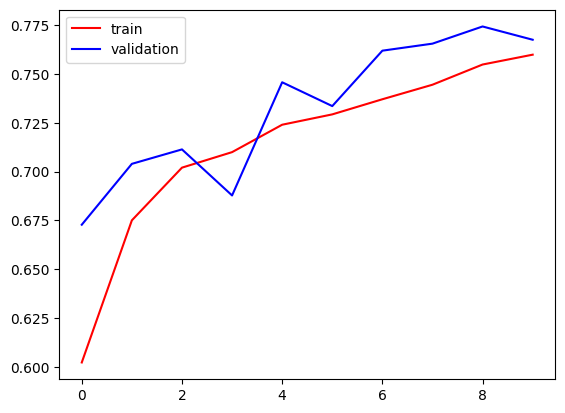

In [ ]:
# Plot the training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

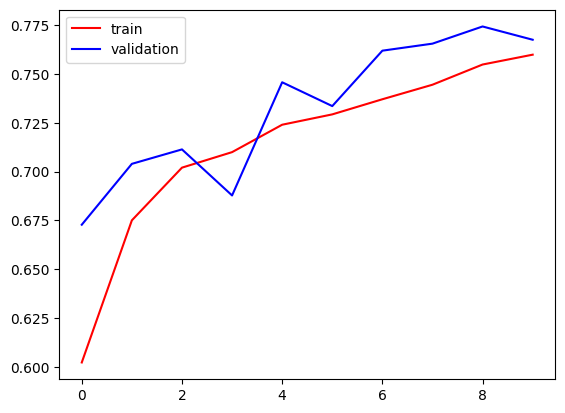

In [ ]:
# Plot the training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

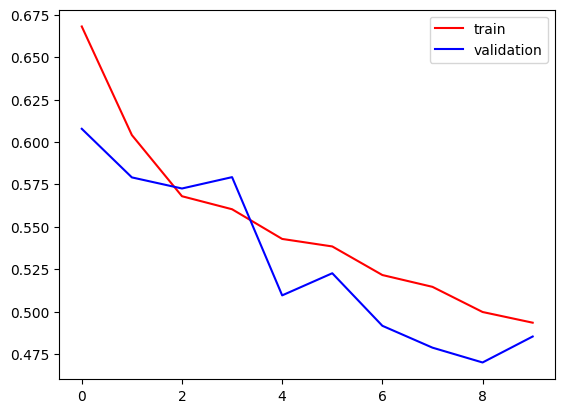

In [ ]:
# Plot loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

### Resize, Rescale, and Autotune

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load a dataset using TensorFlow Datasets (e.g., CIFAR-10)
(train_ds, val_ds, test_ds), ds_info = tfds.load(
    'cifar10',
    split=['train[:80%]', 'train[80%:]', 'test'],
    as_supervised=True,
    with_info=True
)

# Now apply the `prepare` function to these datasets
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.LY6ZOY_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.LY6ZOY_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
import tensorflow as tf

# Constants
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# Step 1: Resize and Rescale Function
def resize_and_rescale(image):
    image = tf.image.resize(image, [224, 224])  # Resize to the desired size
    image = image / 255.0  # Rescale pixel values to [0, 1]
    return image

# Step 2: Dataset Preparation Function
def prepare(ds, augment=False):
    # Resize and rescale all datasets.
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
                num_parallel_calls=AUTOTUNE)

    # Batch all datasets.
    ds = ds.batch(batch_size)

    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (x, y),  # Replace this with your augmentation function if needed
                    num_parallel_calls=AUTOTUNE)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

# Usage Example: Assuming train_ds, val_ds, and test_ds are already defined
train_ds = prepare(train_ds, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

## Data Augmentation using tf.image

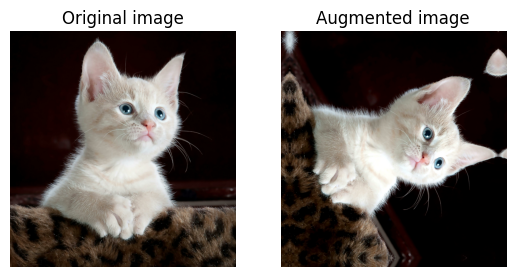

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Example usage
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))
augmented_image = data_augmentation(tf.expand_dims(sample_image, 0))

visualize(sample_image.numpy().astype("uint8"), augmented_image[0].numpy().astype("uint8"))

### Horizontal flip

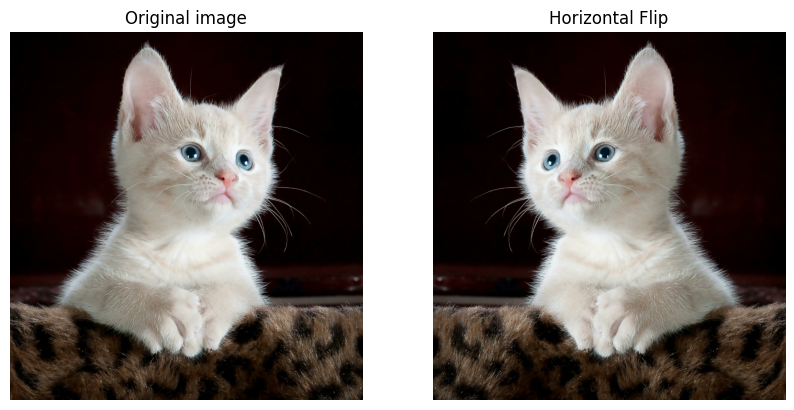

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def horizontal_flip(image):
    return tf.image.flip_left_right(image)

# Load the sample image
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))

# Apply the horizontal flip
flipped_image = horizontal_flip(sample_image)

# Visualize the original and flipped images
def visualize(original, augmented, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Convert the images to uint8 and visualize
visualize(sample_image.numpy().astype("uint8"), flipped_image.numpy().astype("uint8"), "Horizontal Flip")

### Vertical Flip Function

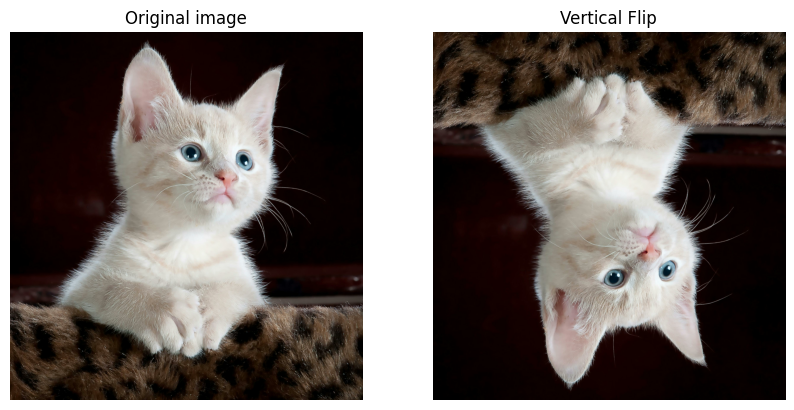

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def vertical_flip(image):
    return tf.image.flip_up_down(image)

# Load the sample image
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))

# Apply the vertical flip
flipped_vertical_image = vertical_flip(sample_image)

# Visualize the original and flipped images
def visualize(original, augmented, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Convert the images to uint8 and visualize
visualize(sample_image.numpy().astype("uint8"), flipped_vertical_image.numpy().astype("uint8"), "Vertical Flip")

### Rotation by 90 Degrees

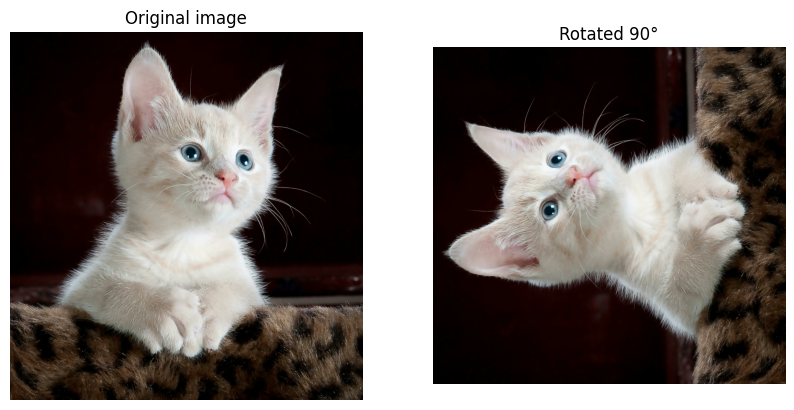

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def rotate_90(image, k):
    return tf.image.rot90(image, k=k)  # k=1 for 90°, k=2 for 180°, k=3 for 270°

# Load the sample image
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))

# Apply rotation by 90 degrees
rotated_image_90 = rotate_90(sample_image, k=1)  # Rotate by 90 degrees

# Visualize the original and rotated images
def visualize(original, augmented, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Convert the images to uint8 and visualize
visualize(sample_image.numpy().astype("uint8"), rotated_image_90.numpy().astype("uint8"), "Rotated 90°")

### Random Brightness

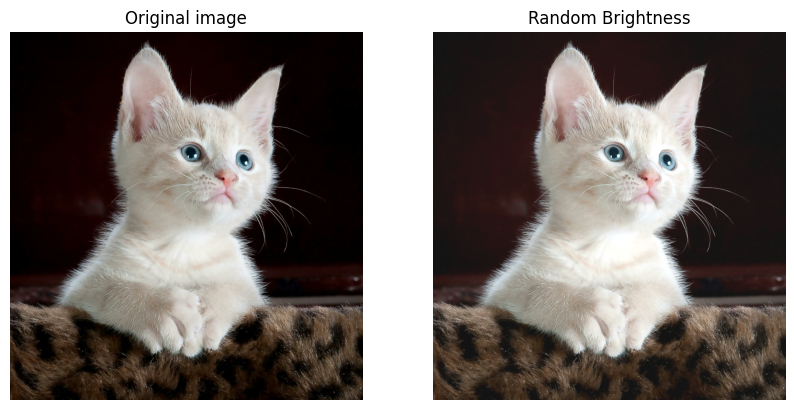

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def random_brightness(image, max_delta=0.2):
    return tf.image.random_brightness(image, max_delta=max_delta)

# Load the sample image
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))

# Apply random brightness adjustment
bright_image = random_brightness(sample_image)

# Visualize the original and adjusted images
def visualize(original, augmented, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Convert the images to uint8 and visualize
visualize(sample_image.numpy().astype("uint8"), bright_image.numpy().astype("uint8"), "Random Brightness")

### Random Contrast

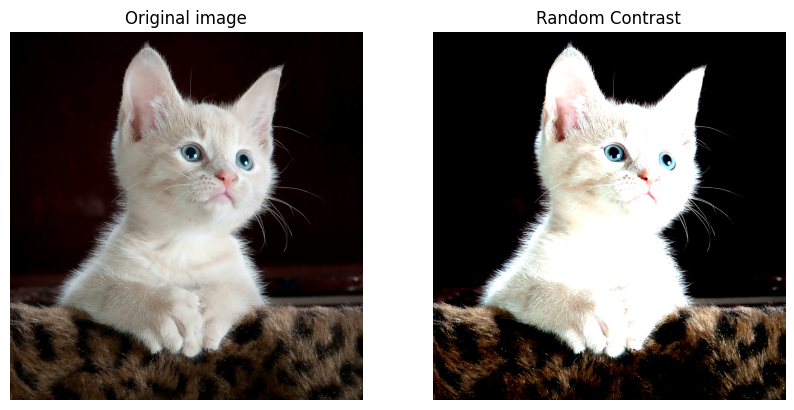

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def random_contrast(image, lower=1.5, upper=2.0):
    return tf.image.random_contrast(image, lower=lower, upper=upper)

# Load the sample image
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))

# Apply random contrast adjustment
contrasted_image = random_contrast(sample_image)

# Visualize the original and adjusted images
def visualize(original, augmented, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Convert the images to uint8 and visualize
visualize(sample_image.numpy().astype("uint8"), contrasted_image.numpy().astype("uint8"), "Random Contrast")

### Random Zoom (Cropping)

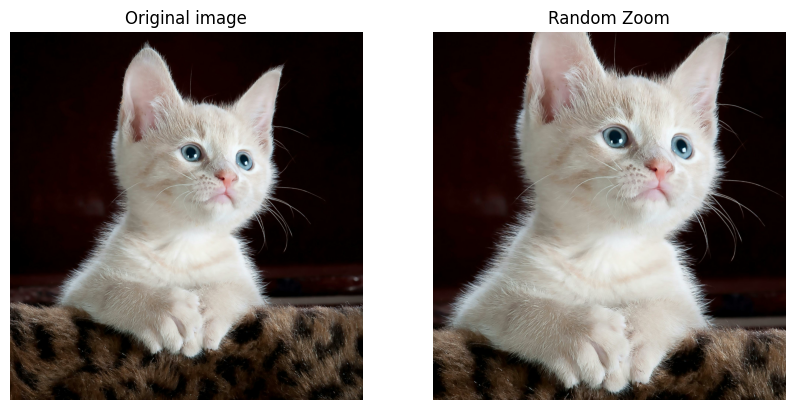

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def random_zoom(image, zoom_factor=0.8):
    original_shape = tf.shape(image)
    new_height = tf.cast(tf.cast(original_shape[0], tf.float32) * zoom_factor, tf.int32)
    new_width = tf.cast(tf.cast(original_shape[1], tf.float32) * zoom_factor, tf.int32)

    # Resize the image to zoom in
    image = tf.image.resize_with_crop_or_pad(image, new_height, new_width)
    # Resize back to the original size
    image = tf.image.resize(image, [original_shape[0], original_shape[1]])
    return image

# Load the sample image
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))

# Apply random zoom with a zoom factor
zoomed_image = random_zoom(sample_image, zoom_factor=0.8)

# Visualize the original and zoomed images
def visualize(original, augmented, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Convert the images to uint8 and visualize
visualize(sample_image.numpy().astype("uint8"), zoomed_image.numpy().astype("uint8"), "Random Zoom")

### Color Jitter

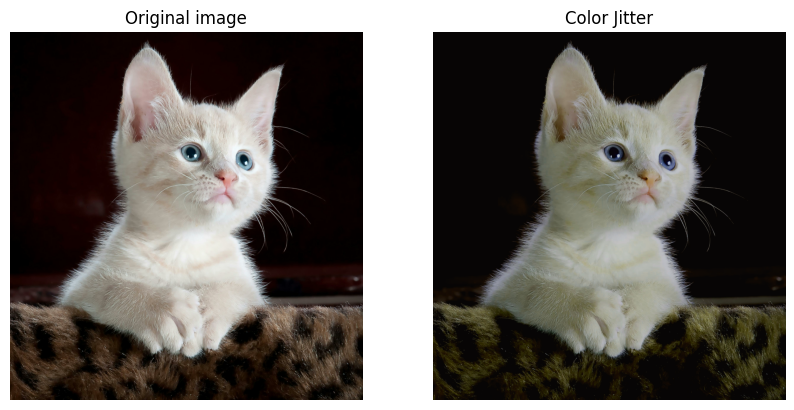

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def color_jitter(image, brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1):
    image = tf.image.random_brightness(image, max_delta=brightness)
    image = tf.image.random_contrast(image, lower=1-contrast, upper=1+contrast)
    image = tf.image.random_saturation(image, lower=1-saturation, upper=1+saturation)
    image = tf.image.random_hue(image, max_delta=hue)
    return image

# Load the sample image
sample_image = tf.image.decode_jpeg(tf.io.read_file('/content/cat_image.jpeg'))

# Apply color jitter
jittered_image = color_jitter(sample_image, brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)

# Visualize the original and jittered images
def visualize(original, augmented, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(augmented)
    plt.axis("off")
    plt.show()

# Convert the images to uint8 and visualize
visualize(sample_image.numpy().astype("uint8"), jittered_image.numpy().astype("uint8"), "Color Jitter")